In [1]:
import matplotlib.pyplot as plt
from collections import defaultdict
from pyvis.network import Network

In [2]:
colors = [
            [0,1,2,3,4,5,6,7,8],
        ]

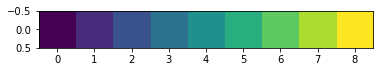

In [3]:
plt.imshow(colors)
plt.show()

In [4]:
class Node : 
    
    def __init__(self, idx, data = 0) : # Constructor   
        """
        id : Integer (1, 2, 3, ...)
        """
        self.id = idx
        self.data = data
        self.connectedTo = defaultdict(lambda:0)

    def addNeighbour(self, neighbour , weight = 0) :
        """
        neighbour : Node Object
        weight : Default Value = 0
        adds the neightbour_id : wt pair into the dictionary
        """
        self.connectedTo[neighbour.id] = weight

    # setter
    def setData(self, data) : 
        self.data = data 

    #getter
    def getConnections(self) : 
        return self.connectedTo.keys()

    def getID(self) : 
        return self.id
    
    def getData(self) : 
        return self.data

    def getWeight(self, neighbour) : 
        return self.connectedTo[neighbour.id]

    def __str__(self) : 
        return str(self.data) + " Connected to : "+ \
         str([x.data for x in self.connectedTo])

In [5]:
class Graph : 

    totalV = 0 # total vertices in the graph
    
    def __init__(self) : 
        """
        allNodes = Dictionary (key:value)
                   idx : Node Object
        """
        self.allNodes = dict()

    def addNode(self, idx) : 
        """ adds the node """
        if idx in self.allNodes : 
            return None
        
        Graph.totalV += 1
        node = Node(idx=idx)
        self.allNodes[idx] = node
        return node

    def addNodeData(self, idx, data) : 
        """ set node data acc to idx """
        if idx in self.allNodes : 
            node = self.allNodes[idx]
            node.setData(data)
        else : 
            print("No ID to add the data.")

    def addEdge(self, src, dst, wt = 0) : 
        """
        Adds edge between 2 nodes
        Undirected graph
        src = node_id = edge starts from
        dst = node_id = edge ends at
        To make it a directed graph comment the second line
        """
        self.allNodes[src].addNeighbour(self.allNodes[dst], wt)
        self.allNodes[dst].addNeighbour(self.allNodes[src], wt)
    
    def isNeighbour(self, u, v) : 
        """
        check neighbour exists or not
        """
        if u >=1 and u <= 81 and v >=1 and v<= 81 and u !=v : 
            if v in self.allNodes[u].getConnections() : 
                return True
        return False



    def printEdges(self) : 
        """ print all edges """
        for idx in self.allNodes :
            node =  self.allNodes[idx]
            for con in node.getConnections() : 
                print(node.getID(), " --> ", 
                self.allNodes[con].getID())
    
    # getter
    def getNode(self, idx) : 
        if idx in self.allNodes : 
            return self.allNodes[idx]
        return None

    def getAllNodesIds(self) : 
        return self.allNodes.keys()

    # methods
    def DFS(self, start) :
        """
        start is an id of the start node
        """ 
        # STACK
        visited = [False]*Graph.totalV

        if start in self.allNodes.keys() : 
            self.__DFSUtility(node_id = start, visited=visited) 
        else : 
            print("Start Node not found")

    def __DFSUtility(self, node_id, visited) : 
        visited = self.__setVisitedTrue(visited=visited, node_id=node_id)
        #print
        print(self.allNodes[node_id].getID(), end = " ")

        #Recursive Stack
        for i in self.allNodes[node_id].getConnections() : 
            if visited[self.allNodes[i].getID()] == False : 
                self.__DFSUtility(node_id = self.allNodes[i].getID(), 
                visited=visited)

    def BFS(self, start) : 
        """
        start is an id of the start node
        """
        #Queue
        visited = [False]*Graph.totalV

        if start in self.allNodes.keys() : 
            self.__BFSUtility(node_id = start, visited=visited) 
        else : 
            print("Start Node not found")

    def __BFSUtility(self, node_id, visited) :
        queue = []
        visited = self.__setVisitedTrue(visited=visited, node_id=node_id)

        queue.append(node_id)

        while queue != [] : 
            x = queue.pop(0) 
            #print
            print(self.allNodes[x].getID(), end = " ")

            for i in self.allNodes[x].getConnections() : 
                idx = self.allNodes[i].getID()
                if visited[idx]  == False : 
                    queue.append(idx)
                    visited = self.__setVisitedTrue(visited=visited,
                     node_id=idx)
        


    def __setVisitedTrue(self, visited, node_id) : 
        """
        Utility function for BFS and DFS 
        
        Through this function we will set visited[id] = True
        Preprocessing node_id if required
        Since now node_id is an integer it is not required to preprocess it
        """
        visited[node_id] = True
        return visited

In [6]:
g = Graph()
for i in range(6) :
    g.addNode(i)

print("Vertices : ",g.getAllNodesIds())

g.addEdge(src = 0, dst = 1, wt = 5)
g.addEdge(0,5,2)
g.addEdge(1,2,4)
g.addEdge(2,3,9)
g.addEdge(3,4,7)
g.addEdge(3,5,3)
g.addEdge(4,0,1)
g.addEdge(5,4,8)
g.addEdge(5,2,1)

g.printEdges()

print("DFS : (starting with 0)")
g.DFS(0)
print()

print("BFS : (starting with 0)")
g.BFS(0)
print()

Vertices :  dict_keys([0, 1, 2, 3, 4, 5])
0  -->  1
0  -->  5
0  -->  4
1  -->  0
1  -->  2
2  -->  1
2  -->  3
2  -->  5
3  -->  2
3  -->  4
3  -->  5
4  -->  3
4  -->  0
4  -->  5
5  -->  0
5  -->  3
5  -->  4
5  -->  2
DFS : (starting with 0)
0 1 2 3 4 5 
BFS : (starting with 0)
0 1 5 4 2 3 


In [7]:
class SudokuConnections : 
    def __init__(self) :  # constructor

        self.graph = Graph() # Graph Object

        self.rows = 9
        self.cols = 9
        self.total_blocks = self.rows*self.cols #81

        self.__generateGraph() # Generates all the nodes
        self.connectEdges() # connects all the nodes acc to sudoku constraints

        self.allIds = self.graph.getAllNodesIds() # storing all the ids in a list

        

    def __generateGraph(self) : 
        """
        Generates nodes with id from 1 to 81.
        Both inclusive
        """
        for idx in range(1, self.total_blocks+1) : 
            _ = self.graph.addNode(idx)

    def connectEdges(self) : 
        """
        Connect nodes according to Sudoku Constraints : 
        # ROWS
       from start of each id number connect all the 
       successive numbers till you reach a multiple of 9
        # COLS (add 9 (+9))
        from start of id number. +9 for each connection
        till you reach a number >= 73 and <= 81
        # BLOCKS
        Connect all the elements in the block which do not 
        come in the same column or row.
        1   2   3
        10  11  12
        19  20  21
        1 -> 11, 12, 20, 21
        2 -> 10, 19, 12, 21
        3 -> 10, 11, 19, 20 
        Similarly for 10, 11, 12, 19, 20, 21.
        """
        matrix = self.__getGridMatrix()

        head_connections = dict() # head : connections

        for row in range(9) :
            for col in range(9) : 
                
                head = matrix[row][col] #id of the node
                connections = self.__whatToConnect(matrix, row, col)
                
                head_connections[head] = connections
        # connect all the edges

        self.__connectThose(head_connections=head_connections)
        
    def __connectThose(self, head_connections) : 
        for head in head_connections.keys() : #head is the start idx
            connections = head_connections[head]
            for key in connections :  #get list of all the connections
                for v in connections[key] : 
                    self.graph.addEdge(src=head, dst=v)

 
    def __whatToConnect(self, matrix, rows, cols) :

        """
        matrix : stores the id of each node representing each cell
        returns dictionary
        connections - dictionary
        rows : [all the ids in the rows]
        cols : [all the ids in the cols]
        blocks : [all the ids in the block]
        
        ** to be connected to the head.
        """
        connections = dict()

        row = []
        col = []
        block = []

        # ROWS
        for c in range(cols+1, 9) : 
            row.append(matrix[rows][c])
        
        connections["rows"] = row

        # COLS 
        for r in range(rows+1, 9):
            col.append(matrix[r][cols])
        
        connections["cols"] = col

        # BLOCKS
        
        if rows%3 == 0 : 

            if cols%3 == 0 :
                
                block.append(matrix[rows+1][cols+1])
                block.append(matrix[rows+1][cols+2])
                block.append(matrix[rows+2][cols+1])
                block.append(matrix[rows+2][cols+2])

            elif cols%3 == 1 :
                
                block.append(matrix[rows+1][cols-1])
                block.append(matrix[rows+1][cols+1])
                block.append(matrix[rows+2][cols-1])
                block.append(matrix[rows+2][cols+1])
                
            elif cols%3 == 2 :
                
                block.append(matrix[rows+1][cols-2])
                block.append(matrix[rows+1][cols-1])
                block.append(matrix[rows+2][cols-2])
                block.append(matrix[rows+2][cols-1])

        elif rows%3 == 1 :
            
            if cols%3 == 0 :
                
                block.append(matrix[rows-1][cols+1])
                block.append(matrix[rows-1][cols+2])
                block.append(matrix[rows+1][cols+1])
                block.append(matrix[rows+1][cols+2])

            elif cols%3 == 1 :
                
                block.append(matrix[rows-1][cols-1])
                block.append(matrix[rows-1][cols+1])
                block.append(matrix[rows+1][cols-1])
                block.append(matrix[rows+1][cols+1])
                
            elif cols%3 == 2 :
                
                block.append(matrix[rows-1][cols-2])
                block.append(matrix[rows-1][cols-1])
                block.append(matrix[rows+1][cols-2])
                block.append(matrix[rows+1][cols-1])

        elif rows%3 == 2 :
            
            if cols%3 == 0 :
                
                block.append(matrix[rows-2][cols+1])
                block.append(matrix[rows-2][cols+2])
                block.append(matrix[rows-1][cols+1])
                block.append(matrix[rows-1][cols+2])

            elif cols%3 == 1 :
                
                block.append(matrix[rows-2][cols-1])
                block.append(matrix[rows-2][cols+1])
                block.append(matrix[rows-1][cols-1])
                block.append(matrix[rows-1][cols+1])
                
            elif cols%3 == 2 :
                
                block.append(matrix[rows-2][cols-2])
                block.append(matrix[rows-2][cols-1])
                block.append(matrix[rows-1][cols-2])
                block.append(matrix[rows-1][cols-1])
        
        connections["blocks"] = block
        return connections

    def __getGridMatrix(self) : 
        """
        Generates the 9x9 grid or matrix consisting of node ids.
        
        This matrix will act as amapper of each cell with each node 
        through node ids
        """
        matrix = [[0 for cols in range(self.cols)] 
        for rows in range(self.rows)]

        count = 1
        for rows in range(9) :
            for cols in range(9):
                matrix[rows][cols] = count
                count+=1
        return matrix

In [8]:
sudoku = SudokuConnections()
sudoku.connectEdges()
print("All node Ids : ")
print(sudoku.graph.getAllNodesIds())
print()
for idx in sudoku.graph.getAllNodesIds() : 
    print(idx, "Connected to->", sudoku.graph.allNodes[idx].getConnections())

All node Ids : 
dict_keys([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81])

1 Connected to-> dict_keys([2, 3, 4, 5, 6, 7, 8, 9, 10, 19, 28, 37, 46, 55, 64, 73, 11, 12, 20, 21])
2 Connected to-> dict_keys([1, 3, 4, 5, 6, 7, 8, 9, 11, 20, 29, 38, 47, 56, 65, 74, 10, 12, 19, 21])
3 Connected to-> dict_keys([1, 2, 4, 5, 6, 7, 8, 9, 12, 21, 30, 39, 48, 57, 66, 75, 10, 11, 19, 20])
4 Connected to-> dict_keys([1, 2, 3, 5, 6, 7, 8, 9, 13, 22, 31, 40, 49, 58, 67, 76, 14, 15, 23, 24])
5 Connected to-> dict_keys([1, 2, 3, 4, 6, 7, 8, 9, 14, 23, 32, 41, 50, 59, 68, 77, 13, 15, 22, 24])
6 Connected to-> dict_keys([1, 2, 3, 4, 5, 7, 8, 9, 15, 24, 33, 42, 51, 60, 69, 78, 13, 14, 22, 23])
7 Connected to-> dict_keys([1, 2, 3, 4, 5, 6, 8, 9

In [9]:
net = Network(height="100%",width="100%")
net.toggle_physics(False)

In [10]:
net.add_nodes(list(range(1,82)))
for idx in range(1,82):
    for j in sudoku.graph.allNodes[idx].getConnections():
        net.add_edge(idx,j)

In [11]:
net.show("sudoku.html")

BEFORE SOLVING ...



    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  0 0 0  |  4 0 0  |  0 0 0  |  1
 |  4 0 9  |  0 0 6  |  8 7 0  |  2
 |  0 0 0  |  9 0 0  |  1 0 0  |  3
  - - - - - - - - - - - - - - 
 |  5 0 4  |  0 2 0  |  0 0 9  |  4
 |  0 7 0  |  8 0 4  |  0 6 0  |  5
 |  6 0 0  |  0 3 0  |  5 0 2  |  6
  - - - - - - - - - - - - - - 
 |  0 0 1  |  0 0 7  |  0 0 0  |  7
 |  0 4 3  |  2 0 0  |  6 0 5  |  8
 |  0 0 0  |  0 0 5  |  0 0 0  |  9
  - - - - - - - - - - - - - - 


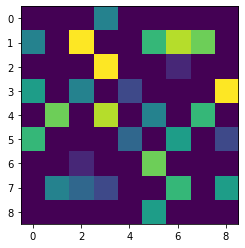


Solving ...



AFTER SOLVING ...



    1 2 3     4 5 6     7 8 9
  - - - - - - - - - - - - - - 
 |  1 8 5  |  4 7 3  |  9 2 6  |  1
 |  4 2 9  |  5 1 6  |  8 7 3  |  2
 |  3 6 7  |  9 8 2  |  1 5 4  |  3
  - - - - - - - - - - - - - - 
 |  5 3 4  |  6 2 1  |  7 8 9  |  4
 |  9 7 2  |  8 5 4  |  3 6 1  |  5
 |  6 1 8  |  7 3 9  |  5 4 2  |  6
  - - - - - - - - - - - - - - 
 |  2 5 1  |  3 6 7  |  4 9 8  |  7
 |  7 4 3  |  2 9 8  |  6 1 5  |  8
 |  8 9 6  |  1 4 5  |  2 3 7  |  9
  - - - - - - - - - - - - - - 


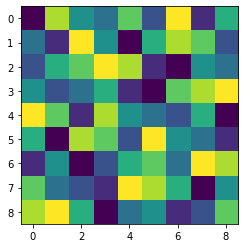

In [12]:
class SudokuBoard : 
    def __init__(self) : 

        self.board = self.getBoard()
        
        self.sudokuGraph = SudokuConnections()
        self.mappedGrid = self.__getMappedMatrix() # Maps all the ids to the position in the matrix

    def __getMappedMatrix(self) : 
        matrix = [[0 for cols in range(9)] 
        for rows in range(9)]

        count = 1
        for rows in range(9) : 
            for cols in range(9):
                matrix[rows][cols] = count
                count+=1
        return matrix

    def getBoard(self) : 

        board = [
            [0,0,0,4,0,0,0,0,0],
            [4,0,9,0,0,6,8,7,0],
            [0,0,0,9,0,0,1,0,0],
            [5,0,4,0,2,0,0,0,9],
            [0,7,0,8,0,4,0,6,0],
            [6,0,0,0,3,0,5,0,2],
            [0,0,1,0,0,7,0,0,0],
            [0,4,3,2,0,0,6,0,5],
            [0,0,0,0,0,5,0,0,0]
        ]
        return board

    def printBoard(self) : 
        print("    1 2 3     4 5 6     7 8 9")
        for i in range(len(self.board)) : 
            if i%3 == 0  :#and i != 0:
                print("  - - - - - - - - - - - - - - ")

            for j in range(len(self.board[i])) : 
                if j %3 == 0 :#and j != 0 : 
                    print(" |  ", end = "")
                if j == 8 :
                    print(self.board[i][j]," | ", i+1)
                else : 
                    print(f"{ self.board[i][j] } ", end="")
        print("  - - - - - - - - - - - - - - ")

    def is_Blank(self) : 
        for row in range(len(self.board)) :
            for col in range(len(self.board[row])) : 
                if self.board[row][col] == 0 : 
                    return (row, col)
        return None

    def isValid(self, num, pos) :
        # ROW
        for col in range(len(self.board[0])):
            if self.board[pos[0]][col] == num and pos[0] != col :
                return False 

        # COL
        for row in range(len(self.board)):
            if self.board[row][pos[1]] == num and pos[1] != row : 
                return False

        # BLOCK
        x = pos[1]//3
        y = pos[0]//3

        for row in range(y*3, y*3+3) :
            for col in range(x*3, x*3+3) :
                if self.board[row][col] == num and (row, col) != pos : 
                    return False

        return True

    def solveItNaive(self) : 
        """
        NAive Solution
        Back Tracking
        """
        find_blank = self.is_Blank()

        if find_blank is None : 
            return True
        else : 
            row, col = find_blank
        for i in range(1,10) :
            if self.isValid(i, (row, col)) :
                self.board[row][col] = i

                if self.solveItNaive() : 
                    return True
                self.board[row][col] = 0
        return False

    def graphColoringInitializeColor(self):
        """
        fill the already given colors
        """
        color = [0] * (self.sudokuGraph.graph.totalV+1)
        given = [] # list of all the ids whos value is already given. Thus cannot be changed
        for row in range(len(self.board)) : 
            for col in range(len(self.board[row])) : 
                if self.board[row][col] != 0 : 
                    #first get the idx of the position
                    idx = self.mappedGrid[row][col]
                    #update the color
                    color[idx] = self.board[row][col] # this is the main imp part
                    given.append(idx)
        return color, given

    def solveGraphColoring(self, m =9) : 
        color, given = self.graphColoringInitializeColor()
        if self.__graphColorUtility(m =m, color=color, v =1, given=given) is None :
            print(":(")
            return False
        count = 1
        for row in range(9) : 
            for col in range(9) :
                self.board[row][col] = color[count]
                count += 1
        return color
    
    def __graphColorUtility(self, m, color, v, given) :
        if v == self.sudokuGraph.graph.totalV +1 : 
            return True
        for c in range(1, m+1) : 
            if self.__isSafe2Color(v, color, c, given) == True :
                color[v] = c
                if self.__graphColorUtility(m, color, v+1, given) : 
                    return True
            if v not in given : 
                color[v] = 0


    def __isSafe2Color(self, v, color, c, given) : 
        if v in given and color[v] == c: 
            return True
        elif v in given : 
            return False

        for i in range(1, self.sudokuGraph.graph.totalV+1) :
            if color[i] == c and self.sudokuGraph.graph.isNeighbour(v, i) :
                return False
        return True


def test() : 
    s = SudokuBoard()
    print("BEFORE SOLVING ...")
    print("\n\n")
    s.printBoard()
    plt.imshow(s.board)
    plt.show()
    print("\nSolving ...")
    print("\n\n\nAFTER SOLVING ...")
    print("\n\n")
    s.solveGraphColoring(m=9)
    s.printBoard()
    plt.imshow(s.board)
    plt.show()

test()

